# Real estate loan prediction

**Objective:** Predict client eligibility for a home loan

**Data :** https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval?select=loan_sanction_test.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/nathan/Desktop/loan_sanction_train.csv')
data_save = data.copy()
data.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
data.shape

(614, 13)

In [3]:
data.Loan_Status.value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Conclusion of Global Analyse (EDA)

  * Dataset size : (615, 13)
  * Target : Yes = 422,  No  = 192   -> 31% N / 69% Y (we have a unbalenced dataset)
  * Different types : object = 8, float = 4, int = 1
  * Missing values : We have 7 columns that contain missing values ​​(not many values).

## Continuous variable histogram

We have here in both cases a positive asymmetry, which means that the outliers are on the left (mean > median). Indeed, the mean in the column `CoapplicantIncome` is 1621 while the median is 1188. Same for the column `LoanAmount`

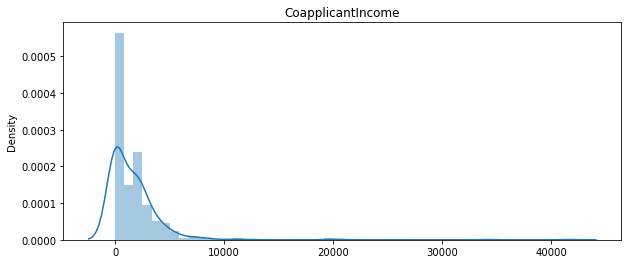

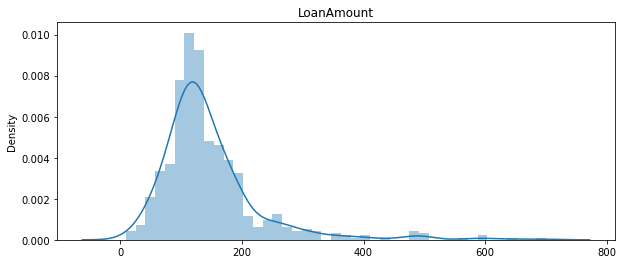

In [6]:
for col in data.select_dtypes('float'):
    if col != 'Credit_History' and col != 'Loan_Amount_Term' :   # credit_history(1/0).
        plt.figure(figsize=[10,4])
        plt.title(col)
        sns.distplot(x = data[col])

## Ratio Credit_History / Target

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


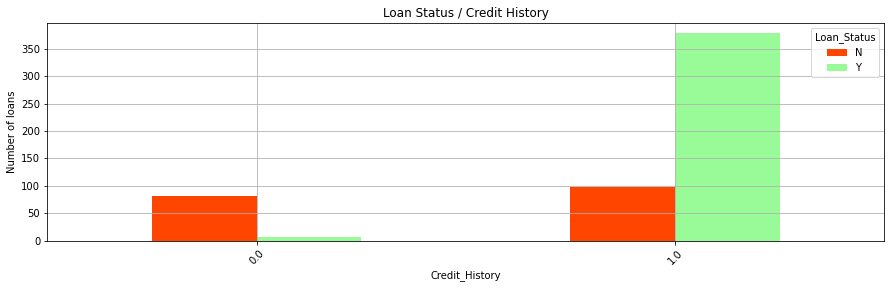

In [7]:
pd.crosstab(data['Credit_History'], data['Loan_Status']).plot.bar(color = ['orangered', 'palegreen'], figsize = [15,4])
plt.xticks(rotation = 45)
plt.title('Loan Status / Credit History')
plt.grid()
plt.ylabel('Number of loans');

pd.crosstab(data['Credit_History'], data['Loan_Status'])

**Credit_history / target:** Concerning our column `Credit_History`, we can notice that a person having already contracted a loan in the past has a much better chance that his new loan will be accepted (79.5% against 7.8%).
So we can hold a hypothesis that having taken out a loan in the past greatly influences the authorization of a new loan

## Ratio Graduate / Target

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


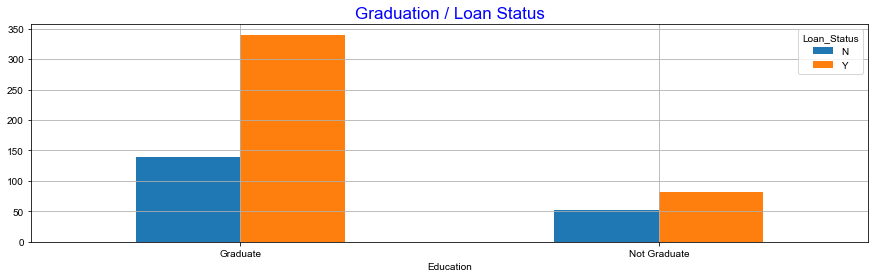

In [8]:
pd.crosstab(data.Education, data.Loan_Status).plot(kind = 'bar', figsize = [15,4])
plt.title('Graduation / Loan Status', color = 'blue', size = 17)
plt.style.use('seaborn-dark')
plt.grid()
plt.xticks(rotation = 0);

pd.crosstab(data.Education, data.Loan_Status)

**Education / Target:** A graduate has a 70% chance of being able to take out a mortgage against 61% for a non-graduate. We can therefore assume that the fact of being a graduate or not has no real impact on the authorization of the loan.

## Outliers

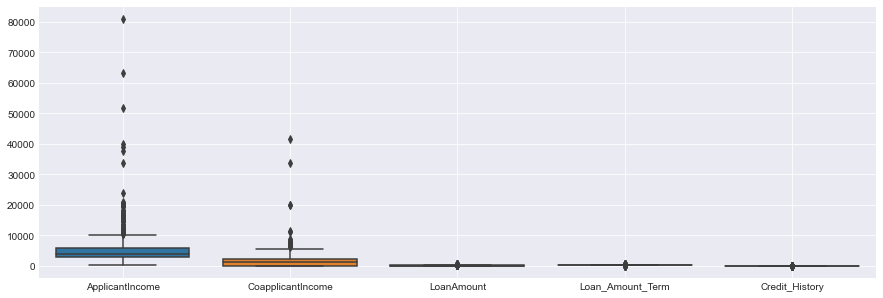

In [9]:
plt.figure(figsize= [15,5])
sns.boxplot(data = data)
plt.style.use('ggplot')
plt.grid()

In [10]:
def detect_outlier(col):
    '''
    function to detect outliers (using z score)
    '''
    outliers = []
    threshold = 3                       # seuil standard
    mean = np.mean(col)
    std = np.std(col)
    
    for i in col : 
        z_score = (i - mean) / std            # formule z-score
        if np.abs(z_score) > threshold :
            outliers.append(i)
    return outliers

In [11]:
detect_outlier(data['ApplicantIncome'])   # drop 81000, 63000

[23803, 39999, 51763, 33846, 39147, 63337, 81000, 37719]

In [12]:
detect_outlier(data['CoapplicantIncome'])    # drop 41000

[10968.0, 11300.0, 20000.0, 20000.0, 33837.0, 41667.0]

## Correlation between variables

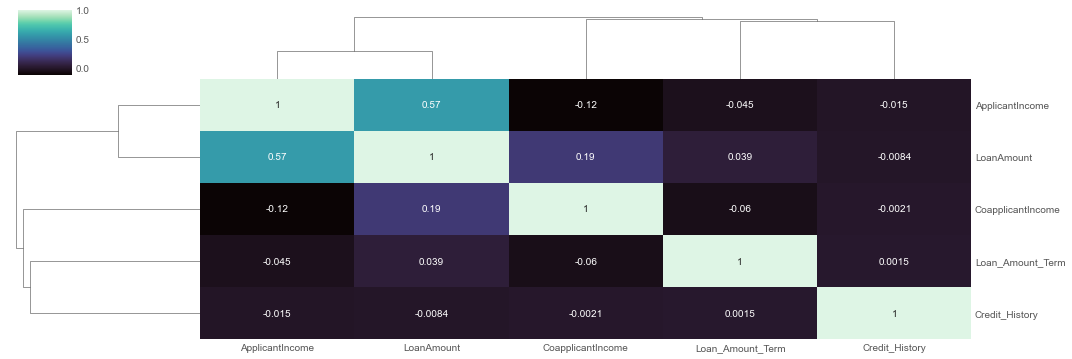

In [13]:
sns.clustermap(data.corr(), annot = True, figsize = [15,5], cmap="mako"); 

# Imputation

In [14]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

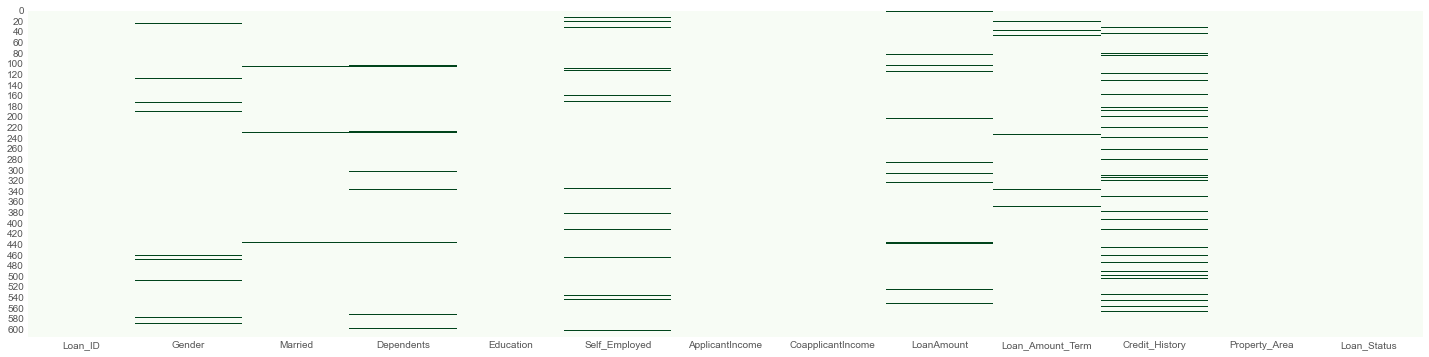

In [15]:
# visualization of missing values

plt.figure(figsize=[25,6])
sns.heatmap(data.isna(), cbar= False,  cmap='Greens');

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


obj_lst = []    # object list
num_lst = []    # numerical list

for column, content in data.items():
    if pd.api.types.is_object_dtype(content):
            obj_lst.append(column)
    elif pd.api.types.is_numeric_dtype(content):
            num_lst.append(column)


object_imputer = SimpleImputer(missing_values=np.nan, strategy = 'constant', fill_value='missing')
int_imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')

imputer = ColumnTransformer([('object_lst', object_imputer, obj_lst),
                                ('int_lst', int_imputer, num_lst)])

In [17]:
df = imputer.fit_transform(data)
df = pd.DataFrame(df, columns= ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 
                                        'Self_Employed', 'Property_Area', 'Target_Loan_Status','ApplicantIncome',
                                        'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History'])

In [18]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Property_Area         0
Target_Loan_Status    0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
dtype: int64

In [19]:
# return the numerical values to those who had it before the imputation

for element in num_lst:
    df[element] = pd.to_numeric(df[element])

## Balance the dataset

In [20]:
from imblearn.over_sampling import RandomOverSampler

x = df.drop('Target_Loan_Status', axis = 1)
y = df.Target_Loan_Status

In [21]:
ross = RandomOverSampler()
x_resample, y_resample = ross.fit_resample(x, y)

In [22]:
x_resample.shape

(844, 12)

In [23]:
y_resample.value_counts()

Y    422
N    422
Name: Target_Loan_Status, dtype: int64

In [24]:
x_resample.duplicated().count()

844

## Encodage

### Features_columns

In [25]:
x_resample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            844 non-null    object 
 1   Gender             844 non-null    object 
 2   Married            844 non-null    object 
 3   Dependents         844 non-null    object 
 4   Education          844 non-null    object 
 5   Self_Employed      844 non-null    object 
 6   Property_Area      844 non-null    object 
 7   ApplicantIncome    844 non-null    float64
 8   CoapplicantIncome  844 non-null    float64
 9   LoanAmount         844 non-null    float64
 10  Loan_Amount_Term   844 non-null    float64
 11  Credit_History     844 non-null    float64
dtypes: float64(5), object(7)
memory usage: 79.2+ KB


In [26]:
def encodage(dataframe):            
    '''
    transforms object types into categorical and then into numeric
    '''
    for column, content in dataframe.items():
        if pd.api.types.is_object_dtype(content):
            dataframe[column] = content.astype('category').cat.as_ordered()

    for column, content in dataframe.items():          # category -> integer (+1)
        if pd.api.types.is_categorical_dtype(content):
                dataframe[column] =  pd.Categorical(content).codes + 1

In [27]:
encodage(x_resample)

### Label Encoder for the Target column

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_resample = label_encoder.fit_transform(y_resample)

In [29]:
y_resample[:15]

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [30]:
X = x_resample
Y = pd.DataFrame(y_resample, columns=['Target'])

### Our data is ready for Modelling ! 

# Modelling

### About metrics

   * Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
   * Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
   * Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
   * F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

np.random.seed(0)
    
x_train, x_test,y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
def one_model(model_to_use, metrics = False, classif = False, conf_matrix = False, model = False):
    
    '''
    here is a function that is able to return several differents metrics
    '''
    
    np.random.seed(0)
    
    global x_train, x_test,y_train, y_test
    
    model = model_to_use
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    if metrics:
    
        print(f'For the model : {model_to_use} :') 
        print(f'The recall_score is : {recall_score(y_test, y_pred)}')  
        print(f'The f1_score is : {f1_score(y_test, y_pred)}') 
        print(f'The precision_score is : {precision_score(y_test, y_pred)}')  
        print(f'The accuracy_score is : {accuracy_score(y_test, y_pred)}\n')   
    
    elif classif :
        print(classification_report(y_test, y_pred))
        
    elif conf_matrix:
        # print(confusion_matrix(y_test, y_pred))
        plt.figure(figsize=[10,6])
        sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'g', linewidths=1, cbar = False)
        plt.title('Confusion Matrix', size = 18);
        
    elif model :
        return model

In [33]:
lst_model = [DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), SVC(), AdaBoostClassifier()]

In [34]:
for element in lst_model:
    one_model(element, metrics = True)

For the model : DecisionTreeClassifier() :
The recall_score is : 0.6626506024096386
The f1_score is : 0.7746478873239436
The precision_score is : 0.9322033898305084
The accuracy_score is : 0.8106508875739645

For the model : RandomForestClassifier() :
The recall_score is : 0.9036144578313253
The f1_score is : 0.9090909090909091
The precision_score is : 0.9146341463414634
The accuracy_score is : 0.9112426035502958

For the model : KNeighborsClassifier() :
The recall_score is : 0.6144578313253012
The f1_score is : 0.6035502958579881
The precision_score is : 0.5930232558139535
The accuracy_score is : 0.6035502958579881

For the model : SVC() :
The recall_score is : 0.8313253012048193
The f1_score is : 0.6330275229357798
The precision_score is : 0.5111111111111111
The accuracy_score is : 0.5266272189349113

For the model : AdaBoostClassifier() :
The recall_score is : 0.8554216867469879
The f1_score is : 0.7759562841530054
The precision_score is : 0.71
The accuracy_score is : 0.757396449704

We can see that the RandomForestRegressor model is the one that gets better results.

## Features Importances 

Feature importance refers to techniques that calculate a score for all input features for a given model - the scores simply represent the "importance" of each feature. A higher score means that the specific characteristic will have a greater effect **on the model used** to predict a certain variable.

In [35]:
one_model(RandomForestClassifier(), model = True).feature_importances_

array([0.15680399, 0.02299854, 0.01976871, 0.04407886, 0.01889596,
       0.02412264, 0.04966439, 0.16247381, 0.09245067, 0.15147506,
       0.02910426, 0.22816312])

In [36]:
features_imp = pd.DataFrame(one_model(RandomForestClassifier(), model = True).feature_importances_, index = X.columns)
features_imp = features_imp.rename(columns = {0 : 'features_importances'})
features_imp

,features_importances
Loan_ID,0.156804
Gender,0.022999
Married,0.019769
Dependents,0.044079
Education,0.018896
Self_Employed,0.024123
Property_Area,0.049664
ApplicantIncome,0.162474
CoapplicantIncome,0.092451
LoanAmount,0.151475


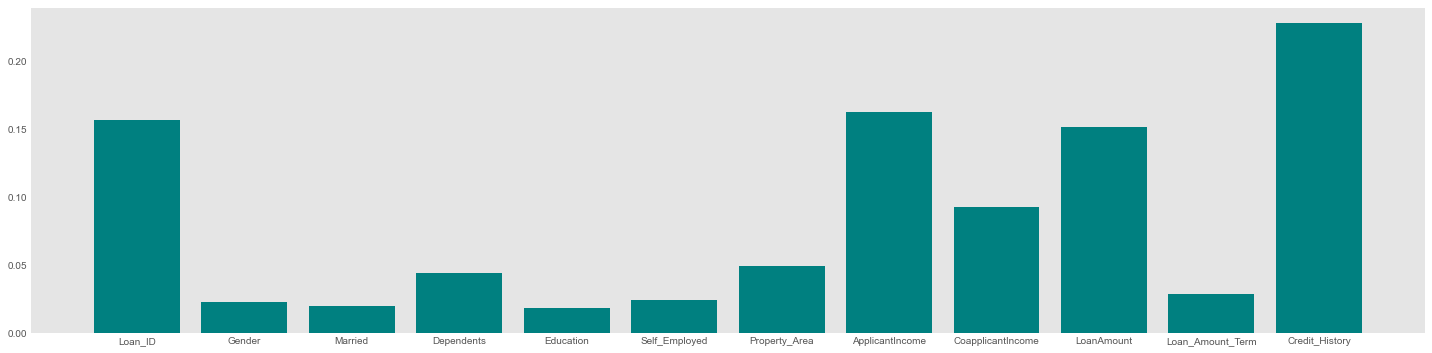

In [37]:
plt.figure(figsize= [25,6])
plt.grid()
plt.bar(x = X.columns, height=features_imp.features_importances, color = 'teal');

We can see the features that our RandomForest model uses the most to predict the Target

## Features selection

We will now try to optimize our model by removing the variables that do not vary (or the least) with the target

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def select_kbest():
    
    np.random.seed(0)    
    for i in range(8,13):
        model_opt = make_pipeline(SelectKBest(f_classif, k = i), 
                                  RandomForestClassifier())
        print(one_model(model_opt, metrics=True))

In [39]:
select_kbest();

For the model : Pipeline(steps=[('selectkbest', SelectKBest(k=8)),
                ('randomforestclassifier', RandomForestClassifier())]) :
The recall_score is : 0.891566265060241
The f1_score is : 0.9192546583850931
The precision_score is : 0.9487179487179487
The accuracy_score is : 0.9230769230769231

None
For the model : Pipeline(steps=[('selectkbest', SelectKBest(k=9)),
                ('randomforestclassifier', RandomForestClassifier())]) :
The recall_score is : 0.891566265060241
The f1_score is : 0.9024390243902438
The precision_score is : 0.9135802469135802
The accuracy_score is : 0.9053254437869822

None
For the model : Pipeline(steps=[('selectkbest', SelectKBest()),
                ('randomforestclassifier', RandomForestClassifier())]) :
The recall_score is : 0.927710843373494
The f1_score is : 0.9221556886227544
The precision_score is : 0.9166666666666666
The accuracy_score is : 0.9230769230769231

None
For the model : Pipeline(steps=[('selectkbest', SelectKBest(k=11)),
     

              precision    recall  f1-score   support

           0       0.91      0.92      0.91        86
           1       0.91      0.90      0.91        83

    accuracy                           0.91       169
   macro avg       0.91      0.91      0.91       169
weighted avg       0.91      0.91      0.91       169



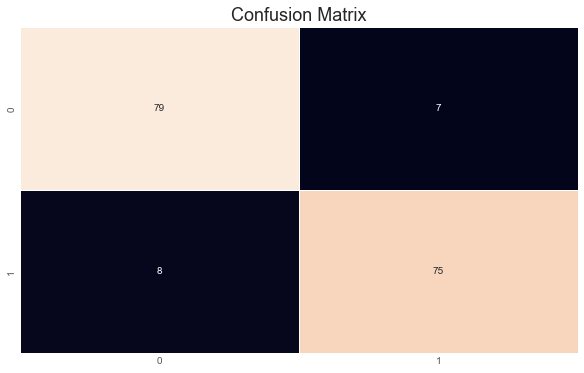

In [40]:
one_model(RandomForestClassifier(), conf_matrix=True), one_model(RandomForestClassifier(), classif=True);

We can see from this matrix that out of 86 people who have had their mortgage accepted, the model has succeeded in predicting 76 (88.37% good answers).

We can also see this on the negatives, where the model predicted 78 correct answers out of 83 (93% good answers).

## Oprimization By RandomizedSearchCV

In [41]:
from sklearn.model_selection import RandomizedSearchCV

model_grid = RandomForestClassifier()
model_grid.fit(x_train, y_train)
print(f'The Accuracy Score is : {round(model_grid.score(x_test, y_test),2)*100} %')

The Accuracy Score is : 91.0 %


In [42]:
%time

np.random.seed(0)

search_params = {'n_estimators' : [50,100,150,200,250, 300],
                  'criterion' : ['gini', 'entropy', 'log_loss'],
                  'max_features' : ['sqrt', 'log2', None],
                  'n_jobs' : [-1,1,None],
                  'random_state': [2,4,6,8,10]}

search = RandomizedSearchCV(model_grid, param_distributions= search_params, n_iter = 10, cv = 5)
search.fit(x_train, y_train)
print(f'The best estimator is : {search.best_estimator_}')
print(f'The best score is : {search.best_score_}')
print(f'The best parameters are : {search.best_params_}')

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs
The best estimator is : RandomForestClassifier(criterion='log_loss', n_estimators=250, random_state=8)
The best score is : 0.8770370370370371
The best parameters are : {'random_state': 8, 'n_jobs': None, 'n_estimators': 250, 'max_features': 'sqrt', 'criterion': 'log_loss'}


In [43]:
one_model(RandomForestClassifier(random_state = 2, n_jobs = None, n_estimators =  200, max_features = 'sqrt', criterion =  'gini'),
         metrics = True, conf_matrix = True)

For the model : RandomForestClassifier(n_estimators=200, random_state=2) :
The recall_score is : 0.9397590361445783
The f1_score is : 0.9341317365269461
The precision_score is : 0.9285714285714286
The accuracy_score is : 0.9349112426035503



# Prediction

In [44]:
test_set = pd.read_csv('/Users/nathan/Desktop/loan_sanction_test.csv')
test_set2 = test_set.copy()
test_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [45]:
x_train.shape, test_set.shape

((675, 12), (367, 12))

The test_set is an original dataset, so it must go through all the steps that the training dataset went through.

In [46]:
# imputation for test_set

obj_lst_test = []    # object list
num_lst_test = []    # numerical list

for column, content in test_set.items():
    if pd.api.types.is_object_dtype(content):
        obj_lst_test.append(column)
    elif pd.api.types.is_numeric_dtype(content):
        num_lst_test.append(column)


object_imputer = SimpleImputer(missing_values=np.nan, strategy = 'constant', fill_value='missing')
int_imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')


imputer_test = ColumnTransformer([('object_lst_test', object_imputer, obj_lst_test),
                            ('int_lst_test', int_imputer, num_lst_test)])

In [47]:
df_test = imputer_test.fit_transform(test_set)
df_test = pd.DataFrame(df_test, columns= ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 
                                'Self_Employed', 'Property_Area','ApplicantIncome',
                                'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History'])

In [48]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [49]:
# encoding test_set

encodage(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Loan_ID            367 non-null    int16
 1   Gender             367 non-null    int8 
 2   Married            367 non-null    int8 
 3   Dependents         367 non-null    int8 
 4   Education          367 non-null    int8 
 5   Self_Employed      367 non-null    int8 
 6   Property_Area      367 non-null    int8 
 7   ApplicantIncome    367 non-null    int16
 8   CoapplicantIncome  367 non-null    int16
 9   LoanAmount         367 non-null    int16
 10  Loan_Amount_Term   367 non-null    int8 
 11  Credit_History     367 non-null    int8 
dtypes: int16(4), int8(8)
memory usage: 5.9 KB


### Prediction on test_set

In [50]:
final_model = one_model(RandomForestClassifier(random_state = 4, n_jobs = None, n_estimators =  200, max_features = 'sqrt', criterion =  'log_loss'),
                        model=True)

In [51]:
predictions = final_model.predict(df_test)

In [52]:
df_test['Prediction'] = predictions
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Prediction
0,1,2,2,1,1,1,3,252,1,53,11,2,0
1,2,2,2,2,1,1,3,103,44,68,11,2,0
2,3,2,2,3,1,1,3,231,68,120,11,2,0
3,4,2,2,3,1,1,3,44,111,43,11,2,0
4,5,2,1,1,2,1,3,121,1,26,11,2,0


In [53]:
df_test.Prediction.value_counts()

0    362
1      5
Name: Prediction, dtype: int64